# Simulation: Subclassing Rebound

Here I've subclassed Rebound's Simulation class. The subclass allows for an easy interface with spacerocks for both input and output.

In [37]:
from spacerocks import SpaceRock, Units
from spacerocks.simulation import Simulation

import uuid
import numpy as np

import matplotlib.pyplot as plt
%matplotlib inline

Define a function that will run at each integration epoch (NOT a heartbeat function)

In [38]:
def func(sim):
    for n in sim.remaining_testparticles:
        p = sim.particles[n]
        if (p.a < 4) or (p.x*p.x + p.y*p.y + p.z*p.z > 1e8):
            sim.remove(hash=n)
            sim.remaining_testparticles = np.delete(sim.remaining_testparticles, 
                                                    np.where(sim.remaining_testparticles == n))

In [39]:
# Instantiate the simulation (default units are au, Msun, days)
sim = Simulation()

# Add perturbers
sim.add_perturbers(['Sun', 
                    'Jupiter Barycenter', 
                    'Saturn Barycenter', 
                    'Uranus Barycenter', 
                    'Neptune Barycenter'], epoch=2459151.5)

# Set simulation details
sim.integrator = 'mercurius'
sim.dt = 30

In [40]:
# Create your rocks
units = Units()
units.timescale = 'tdb'

N = 10

rocks = SpaceRock(a=np.random.uniform(40, 48, N), 
                  e=np.random.uniform(0.0, 0.2, N), 
                  inc=np.random.uniform(0, 5, N),
                  node=np.random.uniform(0, 360, N),
                  arg=np.random.uniform(0, 360, N),
                  M=np.random.uniform(0, 360, N), 
                  epoch=np.repeat(2459151.5, N), 
                  name=[uuid.uuid4().hex for _ in range(N)],
                  origin='ssb', 
                  units=units)


In [41]:
# Add your rocks to the simulation as test particles
sim.add_spacerocks(rocks)

In [42]:
# Set your integration epochs
epochs = np.arange(2459151.5, 2459151.5 + 365.25 * 10_000, 365.25 * 1)

# Do the integration
rocks, planets, snapshot = sim.propagate(epochs, func=func) 

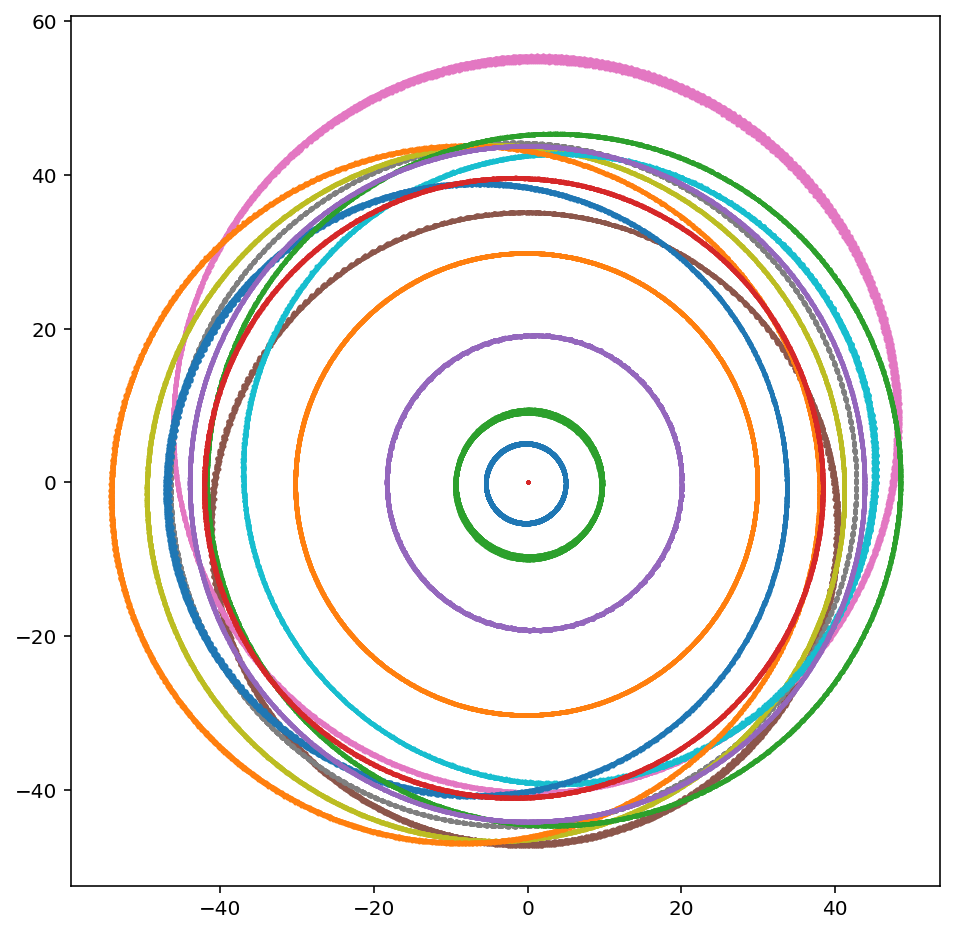

In [43]:
fig, ax = plt.subplots(figsize=(8, 8))
for name in np.unique(planets.name):
    plt.scatter(planets[planets.name == name].x, planets[planets.name == name].y, s=1)

for name in np.unique(rocks.name):
    plt.scatter(rocks[rocks.name == name].x, rocks[rocks.name == name].y, s=1)

ax.set_aspect('equal')